In [136]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Steps

## Read the Data

In [137]:
file = "P:/Datasets/salary-data-simple-linear-regression/Salary_Data.csv"
df = pd.read_csv(file)

## Data Analysis

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [139]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [140]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [141]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [142]:
df.duplicated().sum()

0

## Visualising the data

Text(0, 0.5, 'Salary')

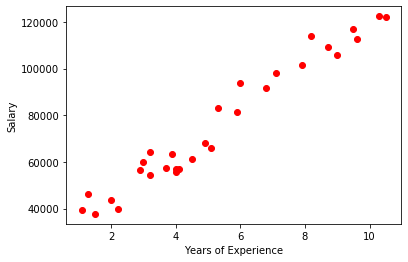

In [143]:
plt.scatter(df.YearsExperience,df.Salary, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [144]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


###### There is a high correlation between YearsExperience and Salary and therefore we can use linear regression to fit the data. There are no outliers.

###### Linear Regression is a supervised machine learning algorithm.It preditcs dependent variable(y) for a given independent variable(x).Basically, it will try to find a linear releastionship between x and y.

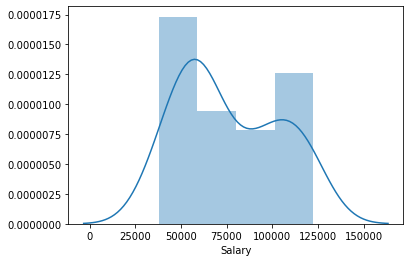

In [145]:
sns.distplot(df.Salary)

(array([ 6., 11.,  2.,  4.,  7.]),
 array([ 37731.,  54663.,  71595.,  88527., 105459., 122391.]),
 <a list of 5 Patch objects>)

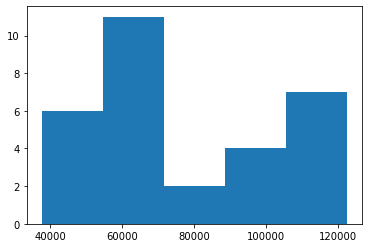

In [146]:
plt.hist(df.Salary, bins=5)

Lets train the model using LinearRegression algorithm. Lets split the data in to X arrays(features) and y arrays(target variables).

In [147]:
X = df[['YearsExperience']].values
y = np.array(df['Salary'])

In [148]:
print(X.ndim,y.ndim)

2 1


Now lets split the data in to trainig and testing data using train_test_split.
We can use the training dataset to train the model and testing dataset to evaluate the model performance.

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)

(21, 1) (9, 1)


#### Assumptions for Linear Regression Models

#### Linear Assumption:
Linear Regression algorithm assumes the data has a linear relationship. When we have a lot of features,
we need to transform to have linear relationship.

#### Remove Noise:

Linear Regression assumes the input and output varibles are noise free. Remove outliers in the data.

#### Remove Collinearity:

The model will overfit we we have highly correlated fetures. Use pairwise plot to see the correlations
and remove the most correlated

#### Gaussian Distribution:

The model will make reliabel predictions if x and y have normal distribution. To make variables look more gaussian,
apply transforms(log, BoxCox) on the variables.Use displot or histplot to see the distribution.

#### Rescaling Features:

Rescale the features to normalise the data. Use StandarScaler and MinMaxScaler to Standardize and normalize the data

## Linear Regression

In [150]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Evaluation:

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-squared**
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted. ... Note : The value of R-square can also be negative when the models fitted is worse than the average fitted model.

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [151]:
def print_evaluate(actual,predict):
    mae = mean_absolute_error(actual,predict)
    mse = mean_squared_error(actual,predict)
    rmse = np.sqrt(mse)
    r2_square = r2_score(actual,predict)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)    
    print("R2_SQUARE:", r2_square)
    
def evaluate(actual,predict):
    mae = mean_absolute_error(actual,predict)
    mse = mean_squared_error(actual,predict)
    rmse = np.sqrt(mse)
    r2_square = r2_score(actual,predict)
    return mae,mse,rmse,r2_square


In [152]:
y_predict = linear.predict(X_test)

In [153]:
print_evaluate(y_test,y_predict)

MAE: 5161.328710400183
MSE: 37784662.46621314
RMSE: 6146.92300799458
R2_SQUARE: 0.9414466227178214


#### Predictions from Model

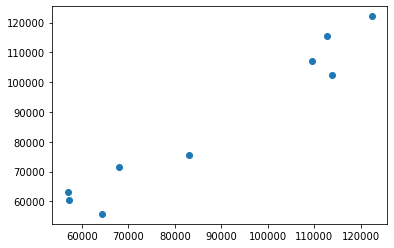

In [183]:
plt.scatter(y_test,y_predict)

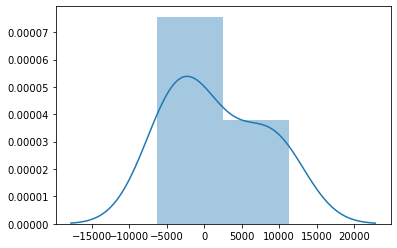

In [155]:
sns.distplot(y_test-y_predict)

In [156]:
results_df = pd.DataFrame([["Linear Regression", *evaluate(y_test,y_predict)]],
                          columns=['Model','MAE','MSE','RMSE','R2_SQUARE'])
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE
0,Linear Regression,5161.32871,3.778466e+07,6146.923008,0.941447


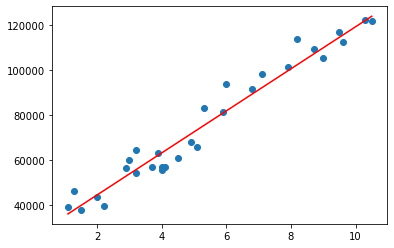

In [157]:
plt.scatter(X,y)
plt.plot(X,linear.predict(X),c='r')

Lets normalize the data to improve the model performance